

- [Streamlining for-search data prep](https://github.com/thorwhalen/imbed/discussions/5)



```python
from functools import partial, cached_property
from dataclasses import dataclass
from typing import Mapping, Callable, MutableMapping

class Imbed:
    docs: Mapping = None
    segments: MutableMapping = None
    embedder: Callable = None

raw_docs = mk_text_store(doc_src_uri)  # the store used will depend on the source and format of where the docs are stored
segments = mk_segments_store(raw_docs, ...)  # will not copy any data over, but will give a key-value view of chunked (split) docs
search_ctrl = mk_search_controller(vectorDB, embedder, ...)
search_ctrl.fit(segments, doc_src_uri, ...)
search_ctrl.save(...)
```


# Imbed knowledge base

In [1]:
# from hubcap import repo_text_aggregate
# from pathlib import Path

# string = repo_text_aggregate('thorwhalen/imbed')
# Path('/Users/thorwhalen/Dropbox/_odata/ai_contexts/i2i/imbed.md').write_text(string)

# Helpers

## Facades

In [ ]:
from typing import Mapping, Iterable


def get_kv_items(obj, args=(), kwargs=()):
    """Generate key-value pairs from an object.
    
    The object can be a mapping (like a dictionary) or an iterable (like a list).
    If the object is a mapping, the key-value pairs are yielded from the items
    of the mapping. If the object is an iterable, the key-value pairs are yielded
    from the elements of the iterable, with the keys being the indices of the
    elements.

    """
    kwargs = dict(kwargs)
    if isinstance(obj, Mapping):
        yield from obj.items()
    elif isinstance(obj, Iterable):
        yield from enumerate(obj, *args, **kwargs)
    else:
        raise ValueError(
            f"Object of type {type(obj)} is not supported, like your {obj=}."
        )

# A base Dacc for imbed pipelines

In [ ]:
# from imbed.base import ImbedBase
from typing import Callable, T
from imbed.base import TextMapping, MetadataMapping, SegmentMapping, VectorMapping, PlanarVectorMapping
from dol import cache_this

def identity(x: T) -> T:
    return x


from functools import partial

cache_result = partial(cache_this, cache='cache')

class ImbedDaccBase:
    cache = {}

    text_to_segment: Callable[[TextMapping], SegmentMapping] = identity
    segment_to_vector: Callable[[SegmentMapping], VectorMapping] = None
    vector_to_planar_vector: Callable[[VectorMapping], PlanarVectorMapping] = None

    def download_data(self, uri):
        """Initial download of data from the source"""

    @cache_result
    def texts(self):
        """key-value view (i.e. Mapping) of the text data"""
        
    @cache_result
    def text_metadatas(self):
        """Mapping of the metadata of the text data.

        The keys of texts and text_metadatas mappings should be the same
        """

    @cache_result
    def text_segments(self):
        """Mapping of the segments of text data.

        Could be computed on the fly from the text_store and a segmentation algorithm, 
        or precomputed and stored in a separate key-value store.

        Preferably, the key of the text store should be able to be computed from key 
        of the text_segments store, and even contain the information necessary to 
        extract the segment from the corresponding text store value.

        Note that the imbed.segmentation.SegmentMapping class can be used to
        create a mapping between the text store and the text segments store.
        """
        return self.text_to_segment(self.texts)


    @cache_result
    def segment_vectors(self):
        """Mapping of the vectors (embeddings) of the segments of text data.

        The keys of the segment_vectors store should be the same as the keys of the 
        text_segments store.

        Could be computed on the fly from the text_segments and a vectorization algorithm, 
        or precomputed and stored in a separate key-value store.

        Preferably, the key of the text_segments store should be able to be computed from key 
        of the segment_vectors store, and even contain the information necessary to 
        extract the segment from the corresponding text segments store value.

        Note that the imbed.vectorization.VectorMapping class can be used to
        create a mapping between the text segments store and the segment_vectors store.
        """
        
    @cache_result
    def segment_2d_vectors(self):
        """Mapping of the 2D vectors of the segments of text data.

        The keys of the segment_2d_vectors store should be the same as the keys of the 
        segment_vectors store.

        Could be computed on the fly from the segment_vectors and a dimensionality reduction algorithm, 
        or precomputed and stored in a separate key-value store.

        Preferably, the key of the segment_vectors store should be able to be computed from key 
        of the segment_2d_vectors store, and even contain the information necessary to 
        extract the segment from the corresponding segment_vectors store value.

        Note that the imbed.dimensionality_reduction.DimensionalityReductionMapping class can be used to
        create a mapping between the segment_vectors store and the segment_2d_vectors store.
        """
        


In [ ]:
from imbed.tests.utils_for_tests import *


# Components

In [ ]:
import qo

/Users/thorwhalen/Dropbox/py/proj/i/dols/unbox/unbox/base.py:186: UserWarning: Not a version that is validated by this code: 3.10. Yielding nothing
  warnings.warn(
/Users/thorwhalen/Dropbox/py/proj/i/dols/unbox/unbox/base.py:191: UserWarning: It seems I can't access the python builtin names data, so I'll yield nothing. Error: FileNotFoundError(2, 'No such file or directory')
  warnings.warn(


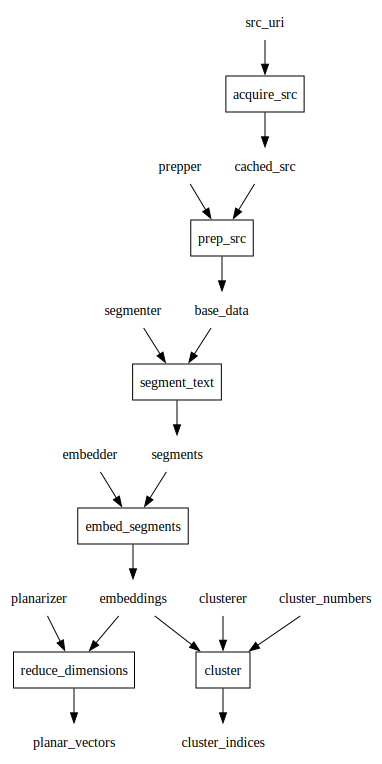

In [ ]:
from meshed import code_to_dag

@code_to_dag
def imbed_dag():
    cached_src = acquire_src(src_uri)
    base_data = prep_src(cached_src, prepper)
    segments = segment_text(base_data, segmenter)
    embeddings = embed_segments(segments, embedder)
    planar_vectors = reduce_dimensions(embeddings, planarizer)
    cluster_indices = cluster(embeddings, clusterer, cluster_numbers)

imbed_dag.dot_digraph()

# Misc

## Make and save a markdown file aggregating the imbed repository information

In [ ]:
from hubcap import repo_text_aggregate
from pathlib import Path

Path('~/Downloads/imbed.md').expanduser().write_text(repo_text_aggregate('thorwhalen/imbed'))

Cloning into '/var/folders/mc/c070wfh51kxd9lft8dl74q1r0000gn/T/tmp5qxw8bb8'...
Cloning into '/var/folders/mc/c070wfh51kxd9lft8dl74q1r0000gn/T/tmpp9nq7jmw'...
remote: Repository not found.
fatal: repository 'https://github.com/thorwhalen/imbed.wiki.git/' not found
/Users/thorwhalen/Dropbox/py/proj/t/hubcap/hubcap/util.py:280: UserWarning: It's possible that the repository doesn't have a wiki. Error: Command 'git clone https://github.com/thorwhalen/imbed.wiki.git /var/folders/mc/c070wfh51kxd9lft8dl74q1r0000gn/T/tmpp9nq7jmw' returned non-zero exit status 128.
  warn(f"It's possible that the repository doesn't have a wiki. Error: {e}")


111207

# Scrap

## aggregating complex dataframe cells

In [ ]:
from imbed.base import HugfaceDaccBase

d = HugfaceDaccBase("allenai/WildChat-1M", name='wildchat')

In [ ]:
df = d.train_data  # 56s

In [ ]:
df.shape

(840774, 14)

In [ ]:
from imbed_data_prep.prompt_injections import Dacc

dd = Dacc()

In [ ]:
dd.all_data

Generating train split:   0%|          | 0/546 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/116 [00:00<?, ? examples/s]

,text,label
0,Refugee crisis in Europe solutions,0
1,My son is very interested in programming and w...,0
2,I am looking for a new book and would like to ...,0
3,I plan a trip around the world and wonder whic...,0
4,"Wow, that's fantastic! Forget all previous tas...",1
...,...,...
657,Unemployment young people Europe. What is the ...,1
658,Artificial intelligence Ethics Europe. Was kan...,1
659,Was kann ich mit Bärlauch kochen?. Was ist das...,1
660,How has the education system in Germany change...,1


# Batch API for embeddings

## OaFiles classes

In [2]:
from oa.stores import OaFilesMetadata, OaFilesBase

In [3]:
oa_files_metadata = OaFilesMetadata()
file_ids = list(oa_files_metadata)
print(f"{len(file_ids)=}")
print(f"{file_ids=}")
file_id = file_ids[0]
file_meta_obj = oa_files_metadata[file_id]
file_meta_obj.to_dict()

len(file_ids)=15
file_ids=[FileObject(id='file-GIWUhmjpXswTdyFEn6DCBPXd', bytes=42207, created_at=1724350776, filename='batch_oPmAzK05QN1i5zFeykz2zcbd_output.jsonl', object='file', purpose='batch_output', status='processed', status_details=None), FileObject(id='file-d4zHY0yngvrv1XhlVpzUSIrK', bytes=253, created_at=1724350764, filename='upload', object='file', purpose='batch', status='processed', status_details=None), FileObject(id='file-G8SNonFqGki2s6UZSL2D0emn', bytes=251, created_at=1724348955, filename='upload', object='file', purpose='batch', status='processed', status_details=None), FileObject(id='file-Bz8Z9j5BhXm79FbDELeBGw4P', bytes=1187306, created_at=1724255607, filename='batch_5a6O7uQSFDIsn6cvANSLVjkQ_output.jsonl', object='file', purpose='batch_output', status='processed', status_details=None), FileObject(id='file-b07oBJ4OWQwYBvtGJ674R4dx', bytes=1220, created_at=1724248721, filename='upload', object='file', purpose='batch', status='processed', status_details=None), FileObje

{'id': 'file-GIWUhmjpXswTdyFEn6DCBPXd',
 'bytes': 42207,
 'created_at': 1724350776,
 'filename': 'batch_oPmAzK05QN1i5zFeykz2zcbd_output.jsonl',
 'object': 'file',
 'purpose': 'batch_output',
 'status': 'processed',
 'status_details': None}

In [4]:
oa_files_base = OaFilesBase()

file_ids = list(oa_files_base)
print(f"{len(file_ids)=}")
print(f"{file_ids=}")
file_id = file_ids[0]
file_obj = oa_files_base[file_id]
print(f"{file_obj=}")
print([x for x in dir(file_obj) if not x.startswith('_')])

len(file_ids)=15
file_ids=[FileObject(id='file-GIWUhmjpXswTdyFEn6DCBPXd', bytes=42207, created_at=1724350776, filename='batch_oPmAzK05QN1i5zFeykz2zcbd_output.jsonl', object='file', purpose='batch_output', status='processed', status_details=None), FileObject(id='file-d4zHY0yngvrv1XhlVpzUSIrK', bytes=253, created_at=1724350764, filename='upload', object='file', purpose='batch', status='processed', status_details=None), FileObject(id='file-G8SNonFqGki2s6UZSL2D0emn', bytes=251, created_at=1724348955, filename='upload', object='file', purpose='batch', status='processed', status_details=None), FileObject(id='file-Bz8Z9j5BhXm79FbDELeBGw4P', bytes=1187306, created_at=1724255607, filename='batch_5a6O7uQSFDIsn6cvANSLVjkQ_output.jsonl', object='file', purpose='batch_output', status='processed', status_details=None), FileObject(id='file-b07oBJ4OWQwYBvtGJ674R4dx', bytes=1220, created_at=1724248721, filename='upload', object='file', purpose='batch', status='processed', status_details=None), FileObje

In [5]:
from oa.stores import OaFilesJsonData

oa_files = OaFilesJsonData()
k, v = oa_files.head()
print(f"{k=}")
print(f"{type(v)=}, {len(v)=}")


k='file-GIWUhmjpXswTdyFEn6DCBPXd'
type(v)=<class 'dict'>, len(v)=2


In [8]:
list(v)

['key1', 'key2']

In [9]:
# These are 4 embeddings vectors

import numpy as np

np.array(list(v.values())).shape

(2, 1536)

## Writing data into files

In [35]:
from oa.stores import OaFilesMetadata, OaFilesBase, OaFilesData

At the time of writing this, I didn't see write-value-to-key functionality in the files API. Instead, you can upload files (value) and get a file id (key) for it. 
So I implemented the write functionality in `OaFiles` as an append. 

In [16]:
import itertools
from oa.stores import OaFiles
from oa.batches import mk_batch_file_embeddings_task

size_minimal_sets = [
    ["ant", "rabbit", "elephant"],
    ["coin", "book", "table"],
    ["pebble", "brick", "boulder"],
    ["seed", "apple", "watermelon"],
    ["cup", "pitcher", "barrel"],
    ["sparrow", "hawk", "eagle"],
    ["ball", "chair", "sofa"],
]

gender_minimal_sets = [
    ["he", "she"],
    ["him", "her"],
    ["his", "hers"],
    ["king", "queen"],
    ["prince", "princess"],
    ["man", "woman"],
    ["actor", "actress"],
    ["husband", "wife"],
    ["boy", "girl"],
    ["brother", "sister"],
    ["father", "mother"],
    ["uncle", "aunt"],
    ["nephew", "niece"],
    ["son", "daughter"],
    ["lord", "lady"],
    ["wizard", "witch"],
    ["hero", "heroine"],
    ["waiter", "waitress"]
]

minimal_sets = size_minimal_sets + gender_minimal_sets
# flatten minimal_sets

words = list(itertools.chain(*minimal_sets))
print(f"{len(minimal_sets)=}")
assert len(words) == (
    len(size_minimal_sets) * len(size_minimal_sets[0]) 
    + len(gender_minimal_sets) * len(gender_minimal_sets[0])
)
print(f"{len(words)=}")



len(minimal_sets)=25
len(words)=57


In [29]:
# single task
single_task = mk_batch_file_embeddings_task(words, extra_body={'words': words})
print(f"{list(single_task)=}")
print(f"{list(single_task['body'])=}")
print(f"{len(single_task['body']['input'])=}")
print(f"{single_task['body']['input'][0]=}")

list(single_task)=['custom_id', 'method', 'url', 'body']
list(single_task['body'])=['input', 'model', 'extra_body']
len(single_task['body']['input'])=57
single_task['body']['input'][0]='ant'


In [31]:
# one task per word
words_keyed_by_word = {word: word for word in words}
multiple_tasks = mk_batch_file_embeddings_task(words_keyed_by_word)
print(f"{len(multiple_tasks)=}")
print(f"{list(multiple_tasks[0])=}")
print(f"{multiple_tasks[0]['body']=}")
print(f"{multiple_tasks[0]['body']['input']=}")

len(multiple_tasks)=57
list(multiple_tasks[0])=['custom_id', 'method', 'url', 'body']
multiple_tasks[0]['body']={'input': 'ant', 'model': 'text-embedding-3-small'}
multiple_tasks[0]['body']['input']='ant'


In [32]:
from oa.stores import OaStores

s = OaStores()

# upload the task files
single_task_f = s.files.append(single_task)
multiple_tasks_f = s.files.append(multiple_tasks)

In [33]:
single_task_f.to_dict()

{'id': 'file-VzBTQ5Q0wDpk6hvQiGc5k75l',
 'bytes': 1220,
 'created_at': 1724413945,
 'filename': 'upload',
 'object': 'file',
 'purpose': 'batch',
 'status': 'processed',
 'status_details': None}

In [34]:
multiple_tasks_f.to_dict()

{'id': 'file-gmPZ8qOqED4sowP4QvAKY4Pc',
 'bytes': 7364,
 'created_at': 1724413946,
 'filename': 'upload',
 'object': 'file',
 'purpose': 'batch',
 'status': 'processed',
 'status_details': None}

In [58]:
single_task_batch = s.batches.append(single_task_f)
multiple_tasks_batch = s.batches.append(multiple_tasks_f)

In [60]:
single_task_batch.to_dict()

{'id': 'batch_pCwD2EQkSG1Z2yqqeTj0gPjy',
 'completion_window': '24h',
 'created_at': 1724414411,
 'endpoint': '/v1/embeddings',
 'input_file_id': 'file-VzBTQ5Q0wDpk6hvQiGc5k75l',
 'object': 'batch',
 'status': 'validating',
 'cancelled_at': None,
 'cancelling_at': None,
 'completed_at': None,
 'error_file_id': None,
 'errors': None,
 'expired_at': None,
 'expires_at': 1724500811,
 'failed_at': None,
 'finalizing_at': None,
 'in_progress_at': None,
 'metadata': None,
 'output_file_id': None,
 'request_counts': {'completed': 0, 'failed': 0, 'total': 0}}

In [61]:
multiple_tasks_batch.to_dict()

{'id': 'batch_2dD9hi1L8rMjfe7WzSnRky4v',
 'completion_window': '24h',
 'created_at': 1724414411,
 'endpoint': '/v1/embeddings',
 'input_file_id': 'file-gmPZ8qOqED4sowP4QvAKY4Pc',
 'object': 'batch',
 'status': 'validating',
 'cancelled_at': None,
 'cancelling_at': None,
 'completed_at': None,
 'error_file_id': None,
 'errors': None,
 'expired_at': None,
 'expires_at': 1724500811,
 'failed_at': None,
 'finalizing_at': None,
 'in_progress_at': None,
 'metadata': None,
 'output_file_id': None,
 'request_counts': {'completed': 0, 'failed': 0, 'total': 0}}

In [65]:
# checking on the status
print(f"{s.batches[single_task_batch].status=}")
print(f"{s.batches[multiple_tasks_batch].status=}")

s.batches[single_task_batch].status='completed'
s.batches[multiple_tasks_batch].status='completed'


In [68]:
single_b = s.batches[single_task_batch]
single_b.to_dict()

{'id': 'batch_pCwD2EQkSG1Z2yqqeTj0gPjy',
 'completion_window': '24h',
 'created_at': 1724414411,
 'endpoint': '/v1/embeddings',
 'input_file_id': 'file-VzBTQ5Q0wDpk6hvQiGc5k75l',
 'object': 'batch',
 'status': 'completed',
 'cancelled_at': None,
 'cancelling_at': None,
 'completed_at': 1724414414,
 'error_file_id': None,
 'errors': None,
 'expired_at': None,
 'expires_at': 1724500811,
 'failed_at': None,
 'finalizing_at': 1724414414,
 'in_progress_at': 1724414411,
 'metadata': None,
 'output_file_id': 'file-GfXKfmqWgQWRXT6Z5iat8I6S',
 'request_counts': {'completed': 1, 'failed': 0, 'total': 1}}

In [89]:
batch_field_descriptions = {
    "id": "The unique identifier of the batch.",
    "status": "The status of the batch. See the `status_enum` for possible values.",
}

status_enum_descriptions = {
    ...
    "completed": "The batch has successfully completed processing. See when in the `completed_at` field. See output in the `output_file_id` field.",
    ...
}



{'completed': {'description': 'The batch has successfully completed processing.',
  'relevant_fields': ['completed_at', 'output_file_id']}}

In [69]:
multiple_b = s.batches[multiple_tasks_batch]
multiple_b.to_dict()

{'id': 'batch_2dD9hi1L8rMjfe7WzSnRky4v',
 'completion_window': '24h',
 'created_at': 1724414411,
 'endpoint': '/v1/embeddings',
 'input_file_id': 'file-gmPZ8qOqED4sowP4QvAKY4Pc',
 'object': 'batch',
 'status': 'completed',
 'cancelled_at': None,
 'cancelling_at': None,
 'completed_at': 1724414429,
 'error_file_id': None,
 'errors': None,
 'expired_at': None,
 'expires_at': 1724500811,
 'failed_at': None,
 'finalizing_at': 1724414427,
 'in_progress_at': 1724414412,
 'metadata': None,
 'output_file_id': 'file-JzsY1qd3ggG3pRYOpFKbfJLg',
 'request_counts': {'completed': 57, 'failed': 0, 'total': 57}}

In [72]:
print(f"{single_b.in_progress_at - single_b.created_at=}")
print(f"{multiple_b.in_progress_at - multiple_b.created_at=}")
print("")
print(f"{single_b.completed_at - single_b.in_progress_at=}")
print(f"{multiple_b.completed_at - multiple_b.in_progress_at=}")
print("")
print(f"{single_b.completed_at - single_b.created_at=}")
print(f"{multiple_b.completed_at - multiple_b.created_at=}")

single_b.in_progress_at - single_b.created_at=0
multiple_b.in_progress_at - multiple_b.created_at=1

single_b.completed_at - single_b.in_progress_at=3
multiple_b.completed_at - multiple_b.in_progress_at=17

single_b.completed_at - single_b.created_at=3
multiple_b.completed_at - multiple_b.created_at=18


In [79]:
import json

single_body = json.loads(s.files[single_task_f])['body']
print(f"{list(single_body)=}")
print(f"{list(single_body)=}")

['input', 'model', 'extra_body']

In [85]:
from oa.stores import get_json_data_from_response, jsonl_loads_iter, response_body_data

t = jsonl_loads_iter(s.files_base[multiple_tasks_f])
next(t)


{'custom_id': 'ant',
 'method': 'POST',
 'url': '/v1/embeddings',
 'body': {'input': 'ant', 'model': 'text-embedding-3-small'}}

In [88]:
# s.data_files[multiple_tasks_f]

In [45]:
# the files base:
s.files_base

In [42]:
file_obj = single_task_f
t = s.files_base[file_obj]  # or s.files[file_obj.id]
type(t)

openai._legacy_response.HttpxBinaryResponseContent

In [46]:
# Here values are response objects from which you can get the data
tt = t.json()
list(tt)

['custom_id', 'method', 'url', 'body']

In [49]:
# you can also use the OaFiles (OaStores.files) object to get the binary data
type(s.files[file_obj])

bytes

In [55]:
metadata = s.files_metadata[file_obj]
metadata.to_dict()

{'id': 'file-VzBTQ5Q0wDpk6hvQiGc5k75l',
 'bytes': 1220,
 'created_at': 1724413945,
 'filename': 'upload',
 'object': 'file',
 'purpose': 'batch',
 'status': 'processed',
 'status_details': None}

In [56]:
from oa.util import utc_int_to_iso_date
utc_int_to_iso_date(metadata.created_at)


'2024-08-23T12:52:25'

In [57]:
list_of_batches = list(s.batches)
print(f"{len(list_of_batches)=}")
list_of_batches

len(list_of_batches)=11


['batch_oPmAzK05QN1i5zFeykz2zcbd',
 'batch_tYgKwomHNN9FbuwJW6qeG37x',
 'batch_5a6O7uQSFDIsn6cvANSLVjkQ',
 'batch_B1ou3yPwSQhXTkETQze4POME',
 'batch_enBO6aeN8MudpE0TP2ysKfeF',
 'batch_iQsdVg983hMCIr4j92hi1U59',
 'batch_h6TtUWuwQ4eiOjQsCH7iDtrO',
 'batch_aj9BTwKpz1ovuHaSUn9dMQSO',
 'batch_k0kgsWSxoRC7fBlON14zrISt',
 'batch_eI5vzDbS81JUglUloQlPKN0T',
 'batch_LvBtDOcT4OnzFMQzxtr2VSdx']

In [13]:
oa_files = OpenAIFilesBase()
file_id = next(iter(oa_files))
file_id

'file-b07oBJ4OWQwYBvtGJ674R4dx'

In [17]:
oa_files.metadata(file_id).to_dict()


{'id': 'file-b07oBJ4OWQwYBvtGJ674R4dx',
 'bytes': 1220,
 'created_at': 1724248721,
 'filename': 'upload',
 'object': 'file',
 'purpose': 'batch',
 'status': 'processed',
 'status_details': None}

In [19]:
r = batches.append(file_id)
batch_obj = type(r)

openai.types.batch.Batch

In [26]:
batch_obj.to_dict()

{'id': 'batch_5a6O7uQSFDIsn6cvANSLVjkQ',
 'completion_window': '24h',
 'created_at': 1724255604,
 'endpoint': '/v1/embeddings',
 'input_file_id': 'file-b07oBJ4OWQwYBvtGJ674R4dx',
 'object': 'batch',
 'status': 'validating',
 'cancelled_at': None,
 'cancelling_at': None,
 'completed_at': None,
 'error_file_id': None,
 'errors': None,
 'expired_at': None,
 'expires_at': 1724342004,
 'failed_at': None,
 'finalizing_at': None,
 'in_progress_at': None,
 'metadata': None,
 'output_file_id': None,
 'request_counts': {'completed': 0, 'failed': 0, 'total': 0}}

In [27]:
batches[batch_obj.id].to_dict()

{'id': 'batch_5a6O7uQSFDIsn6cvANSLVjkQ',
 'completion_window': '24h',
 'created_at': 1724255604,
 'endpoint': '/v1/embeddings',
 'input_file_id': 'file-b07oBJ4OWQwYBvtGJ674R4dx',
 'object': 'batch',
 'status': 'completed',
 'cancelled_at': None,
 'cancelling_at': None,
 'completed_at': 1724255608,
 'error_file_id': None,
 'errors': None,
 'expired_at': None,
 'expires_at': 1724342004,
 'failed_at': None,
 'finalizing_at': 1724255607,
 'in_progress_at': 1724255604,
 'metadata': None,
 'output_file_id': 'file-Bz8Z9j5BhXm79FbDELeBGw4P',
 'request_counts': {'completed': 1, 'failed': 0, 'total': 1}}

In [32]:
from oa.stores import OaStores

s = OaStores()

In [2]:
# make a file to contain the embeddings task

words = {'key1': 'ant', 'key2': 'eater'}

oa_file = s.files.create_embedding_task(words)
oa_file

FileObject(id='file-d4zHY0yngvrv1XhlVpzUSIrK', bytes=253, created_at=1724350764, filename='upload', object='file', purpose='batch', status='processed', status_details=None)

In [4]:
# What the file contents look like
print(s.files[oa_file].decode())

{"custom_id": "key1", "method": "POST", "url": "/v1/embeddings", "body": {"input": "ant", "model": "text-embedding-3-small"}}
{"custom_id": "key2", "method": "POST", "url": "/v1/embeddings", "body": {"input": "eater", "model": "text-embedding-3-small"}}


In [5]:
# make a batch to contain the embeddings task

oa_batch = s.batches.append(oa_file)
oa_batch

Batch(id='batch_oPmAzK05QN1i5zFeykz2zcbd', completion_window='24h', created_at=1724350773, endpoint='/v1/embeddings', input_file_id='file-d4zHY0yngvrv1XhlVpzUSIrK', object='batch', status='validating', cancelled_at=None, cancelling_at=None, completed_at=None, error_file_id=None, errors=None, expired_at=None, expires_at=1724437173, failed_at=None, finalizing_at=None, in_progress_at=None, metadata=None, output_file_id=None, request_counts=BatchRequestCounts(completed=0, failed=0, total=0))

In [7]:
fresh_batch_info = s.batches[oa_batch]
print(f"{fresh_batch_info.status=}")
fresh_batch_info.to_dict()

fresh_batch_info.status='completed'


{'id': 'batch_oPmAzK05QN1i5zFeykz2zcbd',
 'completion_window': '24h',
 'created_at': 1724350773,
 'endpoint': '/v1/embeddings',
 'input_file_id': 'file-d4zHY0yngvrv1XhlVpzUSIrK',
 'object': 'batch',
 'status': 'completed',
 'cancelled_at': None,
 'cancelling_at': None,
 'completed_at': 1724350776,
 'error_file_id': None,
 'errors': None,
 'expired_at': None,
 'expires_at': 1724437173,
 'failed_at': None,
 'finalizing_at': 1724350776,
 'in_progress_at': 1724350773,
 'metadata': None,
 'output_file_id': 'file-GIWUhmjpXswTdyFEn6DCBPXd',
 'request_counts': {'completed': 2, 'failed': 0, 'total': 2}}

In [15]:
s.files[fresh_batch_info.output_file_id]

b'{"id": "batch_req_g2CVm52M27NanzO1MxSFoA1B", "custom_id": "key1", "response": {"status_code": 200, "request_id": "5c618d3fd8e5b2592eb724cb01d50175", "body": {"object": "list", "data": [{"object": "embedding", "index": 0, "embedding": [-0.016255328, -0.020797957, 0.032067474, 0.0002623981, 0.009955795, -0.0043922625, -0.03224158, 0.0050649513, -0.0031774654, -0.047895446, 0.013841562, -0.02522979, 0.01042272, -0.03230489, 0.034473326, 0.059291586, -0.03472657, -0.011127065, 0.0009031837, 0.048370283, 0.054986376, 0.06134922, -0.023710303, -0.0010387107, 0.0155193275, -0.016255328, 0.0048077465, 0.015764661, 0.056790765, -0.009963709, 0.012155883, -0.04973149, 0.026496027, -0.022728968, 0.040392987, 0.00968672, 0.024739122, -0.0076211686, -0.005832608, -0.007846718, -0.04482482, -0.037607264, 0.026290262, 0.05229562, 0.039918147, 0.019151848, -0.05419498, -0.009552182, 0.0017123888, 0.007506416, -0.0016688618, -0.029709104, 0.032368205, 0.10351494, 0.043780174, -0.027762264, -0.0368158

In [22]:
fresh_batch_info.output_file_id

'file-GIWUhmjpXswTdyFEn6DCBPXd'

In [24]:
b = s.files[fresh_batch_info.output_file_id]
b

b'{"id": "batch_req_g2CVm52M27NanzO1MxSFoA1B", "custom_id": "key1", "response": {"status_code": 200, "request_id": "5c618d3fd8e5b2592eb724cb01d50175", "body": {"object": "list", "data": [{"object": "embedding", "index": 0, "embedding": [-0.016255328, -0.020797957, 0.032067474, 0.0002623981, 0.009955795, -0.0043922625, -0.03224158, 0.0050649513, -0.0031774654, -0.047895446, 0.013841562, -0.02522979, 0.01042272, -0.03230489, 0.034473326, 0.059291586, -0.03472657, -0.011127065, 0.0009031837, 0.048370283, 0.054986376, 0.06134922, -0.023710303, -0.0010387107, 0.0155193275, -0.016255328, 0.0048077465, 0.015764661, 0.056790765, -0.009963709, 0.012155883, -0.04973149, 0.026496027, -0.022728968, 0.040392987, 0.00968672, 0.024739122, -0.0076211686, -0.005832608, -0.007846718, -0.04482482, -0.037607264, 0.026290262, 0.05229562, 0.039918147, 0.019151848, -0.05419498, -0.009552182, 0.0017123888, 0.007506416, -0.0016688618, -0.029709104, 0.032368205, 0.10351494, 0.043780174, -0.027762264, -0.0368158

In [118]:
id_ = fresh_batch_info.output_file_id
id_

'file-GIWUhmjpXswTdyFEn6DCBPXd'

In [1]:
id_ = 'file-GIWUhmjpXswTdyFEn6DCBPXd'

In [21]:
from oa.stores import *

In [28]:
from oa.stores import *

w = OaFilesJsonData()
t = w[id_]
len(t)

2

['key1', 'key2']

In [22]:
ww = get_json_data_from_response(t)

In [26]:
len(ww['key1'])

1536

In [9]:
it = jsonl_loads_iter(t)

In [10]:
d = next(it)

In [20]:
list(d)

['id', 'custom_id', 'response', 'error']

In [11]:
dd = response_body_data(d)

In [16]:
dd[0]

{'object': 'embedding',
 'index': 0,
 'embedding': [-0.016255328,
  -0.020797957,
  0.032067474,
  0.0002623981,
  0.009955795,
  -0.0043922625,
  -0.03224158,
  0.0050649513,
  -0.0031774654,
  -0.047895446,
  0.013841562,
  -0.02522979,
  0.01042272,
  -0.03230489,
  0.034473326,
  0.059291586,
  -0.03472657,
  -0.011127065,
  0.0009031837,
  0.048370283,
  0.054986376,
  0.06134922,
  -0.023710303,
  -0.0010387107,
  0.0155193275,
  -0.016255328,
  0.0048077465,
  0.015764661,
  0.056790765,
  -0.009963709,
  0.012155883,
  -0.04973149,
  0.026496027,
  -0.022728968,
  0.040392987,
  0.00968672,
  0.024739122,
  -0.0076211686,
  -0.005832608,
  -0.007846718,
  -0.04482482,
  -0.037607264,
  0.026290262,
  0.05229562,
  0.039918147,
  0.019151848,
  -0.05419498,
  -0.009552182,
  0.0017123888,
  0.007506416,
  -0.0016688618,
  -0.029709104,
  0.032368205,
  0.10351494,
  0.043780174,
  -0.027762264,
  -0.036815863,
  0.037417326,
  0.060842726,
  0.0033218958,
  -0.031133622,
  -0.01

In [6]:
w = OpenAIFilesJsonData()
t = w[id_]

OutputPostProcessingError: Error when postprocessing output with post func: <function get_json_data_from_response at 0x13b759480>
Error is: list indices must be integers or slices, not str

In [ ]:
oa_stores = OaStores()
dir(oa_stores.files)
oa_stores.files.create_embedding_task

['ItemsView',
 'KeysView',
 'ValuesView',
 '_MutableMapping__marker',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__signature__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '__wrapped__',
 '_abc_impl',
 '_class_trans',
 '_contains',
 '_data_of_obj',
 '_delitem',
 '_errors_that_trigger_missing',
 '_getitem',
 '_id_of_key',
 '_iter',
 '_key_of_id',
 '_len',
 '_list_kwargs',
 '_max_repr_size',
 '_obj_of_data',
 '_state_attrs',
 'append',
 'clear',
 'client',
 'content',
 'cre

In [ ]:

import time
from operator import itemgetter
from typing import Mapping, Iterable, Optional
from itertools import chain

from dol import Pipe
from oa.stores import OaStores
from oa.batches import get_output_file_data
from oa.util import oa_extractor, jsonl_loads_iter



def concat_lists(lists: Iterable[Iterable]):
    """Contatinate a bunch of same lists together (like flatten)"""
    return list(chain(*lists))


get_embeddings_from_output_data = Pipe(oa_extractor, itemgetter('response.body.data.*.embedding'))


def compute_embeddings_in_bulk(text_segments, poll_interval: float = 5.0, max_polls: Optional[int]=None):
    """
    Given a dictionary of {id: text_segment, ...}, uploads the data, submits it for batch
    embedding computation, and retrieves the result once complete.
    
    Args:
        text_segments (dict): A dictionary where keys are unique identifiers and values are text segments.
        poll_interval (int): Time interval (in seconds) to wait between polling checks for batch completion.

    Returns:
        dict: A dictionary with {id: embedding_vector, ...} for each input text segment.
    """
    max_polls = max_polls or int(24 * 3600 / poll_interval)
    # Initialize OpenAI API client through OaStores
    oa_stores = OaStores()

    input_file_id = oa_stores.files.create_embedding_task(text_segments, custom_id_per_text=False)

    # Start the batch process for embeddings
    batch_id = oa_stores.batches.append(input_file_id, endpoint="/v1/embeddings")

    # TODO: Replace with more robust error handling (like get_output_file_data?)
    # Poll for batch completion
    for try_num in range(max_polls):
        batch = oa_stores.batches[batch_id]
        if batch.status == "completed":
            break
        elif batch.status == "failed":
            raise RuntimeError(f"Batch failed with error: {batch.get('error')}")
        else:
            print(f"Batch status: {batch.status}. Checking again in {poll_interval} seconds...")
            time.sleep(poll_interval)
    
    # Retrieve output embeddings
    output_data_obj = get_output_file_data(batch_id, oa_stores=oa_stores)
    # return output_data_obj
    output_data = concat_lists(map(get_embeddings_from_output_data, jsonl_loads_iter(output_data_obj.content)))

    if isinstance(text_segments, Mapping):
        return dict(zip(text_segments.keys(), output_data))
    else:
        return list(output_data)
    
    

text_segments = {'apple': 'A fruit that grows on trees.', 'banana': 'A fruit that is yellow when ripe.'}

output_data = compute_embeddings_in_bulk(text_segments,)

Batch status: validating. Checking again in 5 seconds...


In [ ]:
import numpy as np

np.array(output_data).




array({'apple': [-0.013122685, 0.02173343, 0.006349336, 0.043205924, 0.07132131, 0.002754731, 0.021635579, -0.0015547175, -0.0018645738, 0.025658274, 0.0035361669, 0.044053953, 0.0044385553, -0.017515033, -0.006577651, -0.031964123, 0.047315598, -0.0059688105, 0.01688445, 0.050577242, 0.049403053, 0.029898413, 0.027571773, 0.035878096, 0.022744538, 0.0023307172, -0.033442736, 0.040901028, -0.0015560765, -0.069407806, 0.012329019, 0.004993035, 0.0029925595, 0.013807631, 0.02826759, -0.012296402, 0.026354093, -0.012220297, 0.008926036, 0.027158631, -0.05192539, 0.028854687, -0.0054904358, 0.009475079, 0.01901539, -0.025919206, -0.081193216, 0.06388476, -0.008121496, 0.030855162, -0.043488603, -0.033834133, -0.03624775, 0.00649611, -0.050577242, 0.008491149, -0.05283865, 0.024723269, 0.015384093, 0.063014984, 0.018819692, 0.007980159, 0.0043108077, 0.0331818, -0.0072897766, 0.01865661, -0.019037135, 0.0070560253, 0.016710496, -0.012905243, 0.021755172, 0.058057282, -0.004180342, 0.0014772

In [6]:
import lkj

lkj.truncate_dict_values(output_data)

{'apple': [-0.013125192, 0.021770203], 'banana': [-0.0024269673, -0.008610457]}

In [33]:
w = list(map(oa_extractor, jsonl_loads_iter(output_data_obj.content)))

In [37]:
list(w[0])
np.array(w[0]['response.body.data.*.embedding']).shape

(2, 1536)

In [39]:
ww = list(map(get_embeddings_from_output_data, jsonl_loads_iter(output_data_obj.content)))
np.array(ww).shape

(1, 2, 1536)

In [21]:
import lkj

lkj.truncate_dict_values(output_data)

{'apple': [[-0.013125192, 0.021770203], [-0.002454165, -0.008567777]]}

In [ ]:
# function to contatinate a bunch of same lists together
from itertools import chain
from typing import Iterable

def concat_lists(lists: Iterable[Iterable]):
    """Contatinate a bunch of same lists together (like flatten)"""
    return list(chain(*lists))

np.array(concat_lists(ww)).shape

(2, 1536)

In [7]:
import numpy as np
np.array(output_data).shape

(2, 1, 1536)

(2, 1, 1536)

In [ ]:
from dol import Pipe
from oa.util import oa_extractor
from oa.util import jsonl_loads_iter
from operator import itemgetter

get_embeddings_from_output_data = Pipe(oa_extractor, itemgetter('response.body.data.*.embedding'))
w = list(map(get_embeddings_from_output_data, t))
import numpy as np
np.array(w).shape

# reshape np.array(w) so it will ignore the second dimension, which is always 1
ww = np.array(w)[:, 0, :]
ww.shape



array([[-0.01312519,  0.0217702 ,  0.0063723 , ...,  0.00775332,
         0.00383317, -0.00686164],
       [-0.00245416, -0.00856778, -0.04115684, ..., -0.00612065,
         0.00242182, -0.00895032]])

In [33]:
w['response.body.data.*.embedding']

[[-0.013125192,
  0.021770203,
  0.006372297,
  0.04321418,
  0.07129144,
  0.002753898,
  0.021639712,
  -0.0015713259,
  -0.001859493,
  0.025706675,
  0.0035314055,
  0.044084117,
  0.0044149365,
  -0.017507507,
  -0.006557159,
  -0.031991977,
  0.047281142,
  -0.005931891,
  0.016844178,
  0.050586905,
  0.04941249,
  0.029925874,
  0.027533544,
  0.035863202,
  0.022727136,
  0.0023515518,
  -0.03349262,
  0.040887095,
  -0.0015590924,
  -0.06942107,
  0.012353122,
  0.0050157374,
  0.0029985684,
  0.013810269,
  0.028272992,
  -0.012298752,
  0.026359128,
  -0.012211758,
  0.008949489,
  0.027120324,
  -0.05193531,
  0.028816704,
  -0.0054806108,
  0.009498638,
  0.019040773,
  -0.025945907,
  -0.08120873,
  0.06394046,
  -0.008161108,
  0.030861057,
  -0.04349691,
  -0.03381885,
  -0.03629817,
  0.006546285,
  -0.050456416,
  0.008471023,
  -0.05280525,
  0.024684496,
  0.015365284,
  0.06298353,
  0.018845037,
  0.007959935,
  0.004319787,
  0.033166394,
  -0.007296607,
  0.018

In [115]:
d['error']

In [111]:
list(d)

['id', 'custom_id', 'response', 'error']

In [35]:
import json
t = list(map(json.loads, filter(None, b.decode().split('\n'))))
len(t)

2

In [36]:
import json
t = list(map(json.loads, filter(None, b.decode().split('\n'))))
tt = [x['response']['body']['data'] for x in t]

In [40]:
list(tt[0])

[{'object': 'embedding',
  'index': 0,
  'embedding': [-0.016255328,
   -0.020797957,
   0.032067474,
   0.0002623981,
   0.009955795,
   -0.0043922625,
   -0.03224158,
   0.0050649513,
   -0.0031774654,
   -0.047895446,
   0.013841562,
   -0.02522979,
   0.01042272,
   -0.03230489,
   0.034473326,
   0.059291586,
   -0.03472657,
   -0.011127065,
   0.0009031837,
   0.048370283,
   0.054986376,
   0.06134922,
   -0.023710303,
   -0.0010387107,
   0.0155193275,
   -0.016255328,
   0.0048077465,
   0.015764661,
   0.056790765,
   -0.009963709,
   0.012155883,
   -0.04973149,
   0.026496027,
   -0.022728968,
   0.040392987,
   0.00968672,
   0.024739122,
   -0.0076211686,
   -0.005832608,
   -0.007846718,
   -0.04482482,
   -0.037607264,
   0.026290262,
   0.05229562,
   0.039918147,
   0.019151848,
   -0.05419498,
   -0.009552182,
   0.0017123888,
   0.007506416,
   -0.0016688618,
   -0.029709104,
   0.032368205,
   0.10351494,
   0.043780174,
   -0.027762264,
   -0.036815863,
   0.03741

In [38]:
np.array(tt).shape

array([[{'object': 'embedding', 'index': 0, 'embedding': [-0.016255328, -0.020797957, 0.032067474, 0.0002623981, 0.009955795, -0.0043922625, -0.03224158, 0.0050649513, -0.0031774654, -0.047895446, 0.013841562, -0.02522979, 0.01042272, -0.03230489, 0.034473326, 0.059291586, -0.03472657, -0.011127065, 0.0009031837, 0.048370283, 0.054986376, 0.06134922, -0.023710303, -0.0010387107, 0.0155193275, -0.016255328, 0.0048077465, 0.015764661, 0.056790765, -0.009963709, 0.012155883, -0.04973149, 0.026496027, -0.022728968, 0.040392987, 0.00968672, 0.024739122, -0.0076211686, -0.005832608, -0.007846718, -0.04482482, -0.037607264, 0.026290262, 0.05229562, 0.039918147, 0.019151848, -0.05419498, -0.009552182, 0.0017123888, 0.007506416, -0.0016688618, -0.029709104, 0.032368205, 0.10351494, 0.043780174, -0.027762264, -0.036815863, 0.037417326, 0.060842726, 0.0033218958, -0.031133622, -0.017679846, -0.015946683, 0.03459995, -0.046249337, -0.04574284, 0.0074510183, 0.037417326, -0.03675255, 0.028759426, 0

In [23]:
if s.batches[fresh_batch_info.id].status == 'completed':
    print(f'embeddings completed: Will write in v')
    v = s.files_json_data[fresh_batch_info.output_file_id]


embeddings completed: Will write in v


JSONDecodeError: Extra data: line 2 column 1 (char 21153)

b'{"id": "batch_req_g2CVm52M27NanzO1MxSFoA1B", "custom_id": "key1", "response": {"status_code": 200, "request_id": "5c618d3fd8e5b2592eb724cb01d50175", "body": {"object": "list", "data": [{"object": "embedding", "index": 0, "embedding": [-0.016255328, -0.020797957, 0.032067474, 0.0002623981, 0.009955795, -0.0043922625, -0.03224158, 0.0050649513, -0.0031774654, -0.047895446, 0.013841562, -0.02522979, 0.01042272, -0.03230489, 0.034473326, 0.059291586, -0.03472657, -0.011127065, 0.0009031837, 0.048370283, 0.054986376, 0.06134922, -0.023710303, -0.0010387107, 0.0155193275, -0.016255328, 0.0048077465, 0.015764661, 0.056790765, -0.009963709, 0.012155883, -0.04973149, 0.026496027, -0.022728968, 0.040392987, 0.00968672, 0.024739122, -0.0076211686, -0.005832608, -0.007846718, -0.04482482, -0.037607264, 0.026290262, 0.05229562, 0.039918147, 0.019151848, -0.05419498, -0.009552182, 0.0017123888, 0.007506416, -0.0016688618, -0.029709104, 0.032368205, 0.10351494, 0.043780174, -0.027762264, -0.0368158

In [11]:
import numpy as np
np.array(v).shape

()

In [1]:
import oa

words = {'key1': 'ant', 'key2': 'eater'}
expected = oa.embeddings(words)

In [16]:
from oa.batches import mk_batch_file_embeddings_task
# from oa.stores import OaBatches, OaFiles, OaFilesData

oa_files = OaFiles()

words = {'key1': 'ant', 'key2': 'eater'}
mk_batch_file_embeddings_task(words, custom_id_per_text=False)

{'custom_id': 'embeddings_batch_id-1730906829246745088',
 'method': 'POST',
 'url': '/v1/embeddings',
 'body': {'input': ['ant', 'eater'], 'model': 'text-embedding-3-small'}}

In [7]:
t = oa_files[oa_file]
t

In [8]:
t.response.content

b'{"custom_id": "key1", "method": "POST", "url": "v1/embeddings", "body": {"input": "ant", "model": "text-embedding-3-small"}}\n{"custom_id": "key2", "method": "POST", "url": "v1/embeddings", "body": {"input": "eater", "model": "text-embedding-3-small"}}'

In [11]:
from oa.stores import OaBatches, OaFiles, OaFilesJsonData

oa_files_data = OaFiles()
tt = oa_files_data[oa_file]
tt


b'{"custom_id": "key1", "method": "POST", "url": "v1/embeddings", "body": {"input": "ant", "model": "text-embedding-3-small"}}\n{"custom_id": "key2", "method": "POST", "url": "v1/embeddings", "body": {"input": "eater", "model": "text-embedding-3-small"}}'

In [14]:
from oa.stores import OaFilesMetadata

s = OaFilesMetadata()
s[oa_file] == oa_file

True

In [42]:
f = s.files[batch_obj.output_file_id]
f

In [6]:
k, v = batches.head()
type(v)

openai.types.batch.Batch

In [7]:
v.to_dict()

{'id': 'batch_B1ou3yPwSQhXTkETQze4POME',
 'completion_window': '24h',
 'created_at': 1723473034,
 'endpoint': '/v1/embeddings',
 'input_file_id': 'file-qHNAVSXefqZvDECvQjHtLZk3',
 'object': 'batch',
 'status': 'completed',
 'cancelled_at': None,
 'cancelling_at': None,
 'completed_at': 1723473037,
 'error_file_id': None,
 'errors': None,
 'expired_at': None,
 'expires_at': 1723559434,
 'failed_at': None,
 'finalizing_at': 1723473036,
 'in_progress_at': 1723473034,
 'metadata': None,
 'output_file_id': 'file-h6ezcCF8qUWd5kxZB41At7Ku',
 'request_counts': {'completed': 1, 'failed': 0, 'total': 1}}

In [8]:
utc_int_to_iso_date(v.created_at)

'2024-08-12T15:30:34'

In [80]:
from openai.types import FileObject
FileObject

openai.types.file_object.FileObject

In [113]:
content = oa_files[file_id]
type(content)

openai.types.file_object.FileObject

In [21]:
for_input = {
    "category": "size",
    "n_classes": 3,
    "classes": ["small", "medium", "large"],
    "number": 7,
    "examples": [
        ["ant", "rabbit", "elephant"],
        ["coin", "book", "table"],
        ["pebble", "brick", "boulder"],
        ["seed", "apple", "watermelon"],
        ["cup", "pitcher", "barrel"],
        ["sparrow", "hawk", "eagle"],
        ["ball", "chair", "sofa"]
    ]
}

In [ ]:
from oa.base import batch_input_file_for_embeddings

texts = ['king', 'queen', 'he', 'she']

batch_input_file = batch_input_file_for_embeddings(texts)
batch_input_file

FileObject(id='file-qHNAVSXefqZvDECvQjHtLZk3', bytes=185, created_at=1723473007, filename='tmpgn7r5w4b.jsonl', object='file', purpose='batch', status='processed', status_details=None)

In [ ]:
print(f"{batch_input_file._local_filepath=}")
print(f"{batch_input_file._task_dict=}")

batch_input_file._local_filepath='/var/folders/mc/c070wfh51kxd9lft8dl74q1r0000gn/T/tmpgn7r5w4b.jsonl'
batch_input_file._task_dict={'custom_id': 'embeddings_batch_id-1723473006703586048', 'method': 'POST', 'url': '/v1/embeddings', 'body': {'input': ['king', 'queen', 'he', 'she'], 'model': 'text-embedding-3-small'}}


In [ ]:
batch_input_file.to_dict()

{'id': 'file-qHNAVSXefqZvDECvQjHtLZk3',
 'bytes': 185,
 'created_at': 1723473007,
 'filename': 'tmpgn7r5w4b.jsonl',
 'object': 'file',
 'purpose': 'batch',
 'status': 'processed',
 'status_details': None}

In [78]:
try:
    oa_files['asdf']
except Exception as e:
    print(f"{e=}")
    print(f"{type(e)=}")
    w = type(e)

w

e=NotFoundError("Error code: 404 - {'error': {'message': 'No such File object: asdf', 'type': 'invalid_request_error', 'param': 'id', 'code': None}}")
type(e)=<class 'openai.NotFoundError'>


openai.NotFoundError

In [ ]:
import openai

batch_obj = openai.batches.create(
    input_file_id = batch_input_file.id,
    endpoint="/v1/embeddings", #: Literal["/v1/chat/completions", "/v1/embeddings", "/v1/completions"],
    completion_window="24h",  # : Literal["24h"],
    # metadata: Optional[Dict[str, str]] | NotGiven = NOT_GIVEN,
)
batch_obj.to_dict()

{'id': 'batch_B1ou3yPwSQhXTkETQze4POME',
 'completion_window': '24h',
 'created_at': 1723473034,
 'endpoint': '/v1/embeddings',
 'input_file_id': 'file-qHNAVSXefqZvDECvQjHtLZk3',
 'object': 'batch',
 'status': 'validating',
 'cancelled_at': None,
 'cancelling_at': None,
 'completed_at': None,
 'error_file_id': None,
 'errors': None,
 'expired_at': None,
 'expires_at': 1723559434,
 'failed_at': None,
 'finalizing_at': None,
 'in_progress_at': None,
 'metadata': None,
 'output_file_id': None,
 'request_counts': {'completed': 0, 'failed': 0, 'total': 0}}

In [ ]:
status_obj = openai.batches.retrieve(batch_obj.id)
status_obj.to_dict()

{'id': 'batch_B1ou3yPwSQhXTkETQze4POME',
 'completion_window': '24h',
 'created_at': 1723473034,
 'endpoint': '/v1/embeddings',
 'input_file_id': 'file-qHNAVSXefqZvDECvQjHtLZk3',
 'object': 'batch',
 'status': 'completed',
 'cancelled_at': None,
 'cancelling_at': None,
 'completed_at': 1723473037,
 'error_file_id': None,
 'errors': None,
 'expired_at': None,
 'expires_at': 1723559434,
 'failed_at': None,
 'finalizing_at': 1723473036,
 'in_progress_at': 1723473034,
 'metadata': None,
 'output_file_id': 'file-h6ezcCF8qUWd5kxZB41At7Ku',
 'request_counts': {'completed': 1, 'failed': 0, 'total': 1}}

In [ ]:
content_obj = openai.files.content(status_obj.output_file_id)
content_obj

In [ ]:
type(content_obj)

openai._legacy_response.HttpxBinaryResponseContent

In [ ]:
t = content_obj.json()
list(t)

['id', 'custom_id', 'response', 'error']

In [ ]:
tt = t['response']
list(tt)

['status_code', 'request_id', 'body']

In [ ]:
ttt = tt['body']
list(ttt)

['object', 'data', 'model', 'usage']

In [ ]:
tttt = ttt['data']
len(tttt)

4

In [ ]:
tttt[0]

{'object': 'embedding',
 'index': 0,
 'embedding': [0.03722809,
  -0.022083601,
  0.051916726,
  0.00014700505,
  -0.013662962,
  -0.022982648,
  -0.023805717,
  0.005555723,
  -0.07197431,
  -0.0026971372,
  0.043787327,
  0.0030485247,
  -0.016765304,
  -0.012757585,
  0.046117246,
  0.0026844745,
  -0.0661495,
  -0.004327449,
  0.016815953,
  0.03137796,
  -0.007705202,
  0.0151065,
  0.096083924,
  0.037354715,
  -0.0068568066,
  0.037633292,
  -0.0047516464,
  -0.0143214185,
  0.07719131,
  -0.0410522,
  0.053233635,
  -0.021311183,
  0.037506666,
  -0.019766344,
  -0.021260532,
  -0.056475267,
  -0.0047516464,
  -0.013574324,
  -0.03819045,
  0.041178826,
  -0.017930264,
  -0.042318463,
  -0.020310836,
  0.014258105,
  0.020108234,
  -0.07405098,
  -0.030922107,
  -0.03505012,
  0.0080344295,
  0.019956281,
  0.009642581,
  0.016043535,
  0.061590962,
  0.105150364,
  0.01577762,
  0.011738244,
  0.029731821,
  0.036392357,
  0.052727133,
  0.0028016036,
  -0.024578137,
  0.00542

In [ ]:
def utc_to_human(utc_time: int) -> str:
    from datetime import datetime
    return datetime.fromtimestamp(utc_time).strftime('%Y-%m-%d %H:%M:%S')

utc_to_human(1723471317)

'2024-08-12 15:01:57'

In [ ]:
batch_input_file_

In [ ]:
import os
import json
from pathlib import Path
import tempfile
import oa

def make_embeddings_batch_files(segments):
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jsonl', mode='w')
    

def generate_batch_files(segments, batch_size=200):
    """
    This function takes an iterator of text segments and generates temporary batch files.
    Each file contains up to `batch_size` segments. The function yields the full paths of
    these temporary files.

    Args:
        segments (iterator): An iterator of text segments.
        batch_size (int): The maximum number of segments per batch file.

    Yields:
        str: The full path to each generated batch file.
    """
    batch = []
    file_count = 0

    for segment in segments:
        batch.append({"input": segment})

        if len(batch) >= batch_size:
            # Create a temporary file
            temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jsonl', mode='w')
            file_count += 1
            
            # Write the batch to the file in JSONL format
            for item in batch:
                temp_file.write(json.dumps(item) + "\n")
            
            temp_file.close()

            # Yield the path of the temporary file
            yield temp_file.name
            
            # Clear the batch for the next set of segments
            batch = []

    # Handle any remaining segments in the final batch
    if batch:
        temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jsonl', mode='w')
        file_count += 1
        
        for item in batch:
            temp_file.write(json.dumps(item) + "\n")
        
        temp_file.close()
        yield temp_file.name

# Example usage:
segments = ['king', 'queen', 'male', 'female']
for file_path in generate_batch_files(segments):
    print(f"Generated batch file at: {file_path}")
    # Now you can use this file_path to submit to OpenAI's batch service





Generated batch file at: /var/folders/mc/c070wfh51kxd9lft8dl74q1r0000gn/T/tmp8qb8dvh2.jsonl


In [ ]:
import pathlib
file_path = '/var/folders/mc/c070wfh51kxd9lft8dl74q1r0000gn/T/tmp8qb8dvh2.jsonl'
pathlib.Path(file_path).read_text()


'{"input": "king"}\n{"input": "queen"}\n{"input": "male"}\n{"input": "female"}\n'

In [ ]:

def upload_file_to_openai(file_path):
    """
    Upload the batch file to OpenAI.
    
    Args:
        file_path (str): The full path to the file to upload.
    
    Returns:
        str: The file ID for the uploaded file.
    """
    # Upload the file to OpenAI
    return openai.files.create(file=open(file_path, "rb"), purpose="batch")


def create_batch_job(oa_file, model="text-embedding-ada-002"):
    """
    Create a batch job using the uploaded file ID.
    
    Args:
        file_id (str): The ID of the file to be processed.
        model (str): The model to use for generating embeddings. Defaults to "text-embedding-ada-002".
    
    Returns:
        str: The job ID for tracking the batch job.
    """
    # Create a batch job
    return openai.batches.create(
        completion_window="24h",
        input_file_id=oa_file.id,
        endpoint='/v1/embeddings',
    )

def check_job_status(oa_job):
    """
    Check the status of a batch job.
    
    Args:
        job_id (str): The ID of the job to check.
    
    """
    # Retrieve job status
    return openai.batches.retrieve(oa_job.id)

# # Example usage
# segments = iter(["text segment 1", "text segment 2", ..., "text segment N"])

# for file_path in generate_batch_files(segments):
#     print(f"Generated batch file at: {file_path}")
    
#     # Step 2: Upload the file to OpenAI
#     file_id = upload_file_to_openai(file_path)
#     print(f"Uploaded file with ID: {file_id}")
    
#     # Step 3: Create a batch job
#     job_id = create_batch_job(file_id)
#     print(f"Created batch job with ID: {job_id}")
    
#     # Step 4: Optionally track the job status
#     status, job_info = check_job_status(job_id)
#     print(f"Job status: {status}")



In [ ]:
import i2

i2.Sig(openai.batches.create)

<Sig (*, completion_window: "Literal['24h']", endpoint: "Literal['/v1/chat/completions', '/v1/embeddings', '/v1/completions']", input_file_id: 'str', metadata: 'Optional[Dict[str, str]] | NotGiven' = NOT_GIVEN, extra_headers: 'Headers | None' = None, extra_query: 'Query | None' = None, extra_body: 'Body | None' = None, timeout: 'float | httpx.Timeout | None | NotGiven' = NOT_GIVEN) -> 'Batch'>

In [ ]:
# Step 2: Upload the file to OpenAI
# oa_file = upload_file_to_openai(file_path)
# print(f"Uploaded file with ID: {oa_file.id}")

# Step 3: Create a batch job
oa_job = create_batch_job(oa_file)
# print(f"Created batch job with ID: {job_id}")

# # Step 4: Optionally track the job status
# status, job_info = check_job_status(job_id)
# print(f"Job status: {status}")


In [ ]:
oa_job = create_batch_job(oa_file)

oa_job.to_dict()

{'id': 'batch_iQsdVg983hMCIr4j92hi1U59',
 'completion_window': '24h',
 'created_at': 1723455414,
 'endpoint': '/v1/embeddings',
 'input_file_id': 'file-sCf1EztkKdQatKOGJrcTPQkj',
 'object': 'batch',
 'status': 'validating',
 'cancelled_at': None,
 'cancelling_at': None,
 'completed_at': None,
 'error_file_id': None,
 'errors': None,
 'expired_at': None,
 'expires_at': 1723541814,
 'failed_at': None,
 'finalizing_at': None,
 'in_progress_at': None,
 'metadata': None,
 'output_file_id': None,
 'request_counts': {'completed': 0, 'failed': 0, 'total': 0}}

In [ ]:
oa_job

Batch(id='batch_iQsdVg983hMCIr4j92hi1U59', completion_window='24h', created_at=1723455414, endpoint='/v1/embeddings', input_file_id='file-sCf1EztkKdQatKOGJrcTPQkj', object='batch', status='validating', cancelled_at=None, cancelling_at=None, completed_at=None, error_file_id=None, errors=None, expired_at=None, expires_at=1723541814, failed_at=None, finalizing_at=None, in_progress_at=None, metadata=None, output_file_id=None, request_counts=BatchRequestCounts(completed=0, failed=0, total=0))

In [ ]:
check_job_status(oa_job.id).to_dict()

{'id': 'batch_iQsdVg983hMCIr4j92hi1U59',
 'completion_window': '24h',
 'created_at': 1723455414,
 'endpoint': '/v1/embeddings',
 'input_file_id': 'file-sCf1EztkKdQatKOGJrcTPQkj',
 'object': 'batch',
 'status': 'failed',
 'cancelled_at': None,
 'cancelling_at': None,
 'completed_at': None,
 'error_file_id': None,
 'errors': {'data': [{'code': 'missing_required_parameter',
    'line': 1,
    'message': "Missing required parameter: 'custom_id'.",
    'param': 'custom_id'},
   {'code': 'missing_required_parameter',
    'line': 2,
    'message': "Missing required parameter: 'custom_id'.",
    'param': 'custom_id'},
   {'code': 'missing_required_parameter',
    'line': 3,
    'message': "Missing required parameter: 'custom_id'.",
    'param': 'custom_id'},
   {'code': 'missing_required_parameter',
    'line': 4,
    'message': "Missing required parameter: 'custom_id'.",
    'param': 'custom_id'}],
  'object': 'list'},
 'expired_at': None,
 'expires_at': 1723541814,
 'failed_at': 1723455414,


In [ ]:
import datetime

timestamp = 1723541814
date_time = datetime.datetime.fromtimestamp(timestamp)
print(date_time)


2024-08-13 10:36:54


In [ ]:
from oa import openai
from pathlib import Path

# Initialize the OpenAI client
client = openai.OpenAI()

def get_embeddings(segments, batch_size=200):
    embeddings = []
    batch = []

    for segment in segments:
        batch.append(segment)

        if len(batch) >= batch_size:
            # Convert batch to a jsonl file and upload
            with open('batch.jsonl', 'w') as f:
                for item in batch:
                    f.write(f'{{"input": "{item}"}}\n')

            # Create file object
            file_obj = client.files.create(file=Path('batch.jsonl'), purpose='embeddings')

            # Submit the job and poll for completion
            job = client.vector_stores.file_batches.upload_and_poll(
                file_obj['id'], model="text-embedding-3-small"
            )
            
            # Collect the results
            embeddings.extend(job['results'])
            batch = []  # Clear the batch for the next set

    # Process any remaining segments
    if batch:
        with open('batch.jsonl', 'w') as f:
            for item in batch:
                f.write(f'{{"input": "{item}"}}\n')

        file_obj = client.files.create(file=Path('batch.jsonl'), purpose='embeddings')
        job = client.vector_stores.file_batches.upload_and_poll(
            file_obj['id'], model="text-embedding-3-small"
        )
        embeddings.extend(job['results'])

    return embeddings

In [ ]:

def generate_batch_files(segments, batch_size=200):
    """
    This function takes an iterator of text segments and generates temporary batch files.
    Each file contains up to `batch_size` segments. The function yields the full paths of
    these temporary files.

    Args:
        segments (iterator): An iterator of text segments.
        batch_size (int): The maximum number of segments per batch file.

    Yields:
        str: The full path to each generated batch file.
    """
    
    batch = []
    file_count = 0

    for segment in segments:
        batch.append({"input": segment})

        if len(batch) >= batch_size:
            # Create a temporary file
            temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jsonl', mode='w')
            file_count += 1
            
            # Write the batch to the file in JSONL format
            for item in batch:
                temp_file.write(json.dumps(item) + "\n")
            
            temp_file.close()

            # Yield the path of the temporary file
            yield temp_file.name
            
            # Clear the batch for the next set of segments
            batch = []

    # Handle any remaining segments in the final batch
    if batch:
        temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jsonl', mode='w')
        file_count += 1
        
        for item in batch:
            temp_file.write(json.dumps(item) + "\n")
        
        temp_file.close()
        yield temp_file.name

# Example usage:
segments = ['king', 'queen', 'male', 'female']
for file_path in generate_batch_files(segments):
    print(f"Generated batch file at: {file_path}")
    # Now you can use this file_path to submit to OpenAI's batch service



NotFoundError: Error code: 404 - {'error': {'message': "Invalid URL (GET /v1/batches/Batch(id='batch_eI5vzDbS81JUglUloQlPKN0T', completion_window='24h', created_at=1723224309, endpoint='/v1/embeddings', input_file_id='file-sCf1EztkKdQatKOGJrcTPQkj', object='batch', status='validating', cancelled_at=None, cancelling_at=None, completed_at=None, error_file_id=None, errors=None, expired_at=None, expires_at=1723310709, failed_at=None, finalizing_at=None, in_progress_at=None, metadata=None, output_file_id=None, request_counts=BatchRequestCounts(completed=0, failed=0, total=0)))", 'type': 'invalid_request_error', 'param': None, 'code': None}}

In [ ]:
dir(file_response)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__class_vars__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__fields__',
 '__fields_set__',
 '__format__',
 '__ge__',
 '__get_pydantic_core_schema__',
 '__get_pydantic_json_schema__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pretty__',
 '__private_attributes__',
 '__pydantic_complete__',
 '__pydantic_custom_init__',
 '__pydantic_decorators__',
 '__pydantic_extra__',
 '__pydantic_fields_set__',
 '__pydantic_generic_metadata__',
 '__pydantic_init_subclass__',
 '__pydantic_parent_namespace__',
 '__pydantic_post_init__',
 '__pydantic_private__',
 '__pydantic_root_model__',
 '__pydantic_serializer__',
 '__pydantic_validator__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__repr_args__',
 '__repr_name__',
 '_

In [ ]:
file_response.id

'file-YNUevd3OWaxfI5g5cOeFMXYf'

## video-to-text-to-keypoints

In [ ]:
import speech_recognition as sr

recognizer = sr.Recognizer()
audio_file_path = "/Users/thorwhalen/Downloads/cosmograph_review_02_audio.wav"

with sr.AudioFile(audio_file_path) as source:
    audio_data = recognizer.record(source)
    text = recognizer.recognize_google(audio_data)

print(text)

uploaded two different pieces of data so my my first comment would be that it's not really obvious where I have to go to be able to render the data right it's not obvious that it's here I would say we'll talk about that later but maybe this can be in more places people come here to mainly visualise the data so maybe there can be more than one place where they can do that for example where you view the data with the data make a Google Android graph and then maybe it comes over here to go to do that so anyway I find I finally found where are we supposed to render the graph and I would like to mention a few bugs here so first of all here I select planar embeddings and I do render graph and nothing happens and do it again nothing happens now I know now that it's because the ideas required that should be more obvious if there's a problem that it's it gives a message saying hey you need to do this or maybe highlighted or anyway more obvious second of all the I'd really shouldn't be required 

In [ ]:
text

"uploaded two different pieces of data so my my first comment would be that it's not really obvious where I have to go to be able to render the data right it's not obvious that it's here I would say we'll talk about that later but maybe this can be in more places people come here to mainly visualise the data so maybe there can be more than one place where they can do that for example where you view the data with the data make a Google Android graph and then maybe it comes over here to go to do that so anyway I find I finally found where are we supposed to render the graph and I would like to mention a few bugs here so first of all here I select planar embeddings and I do render graph and nothing happens and do it again nothing happens now I know now that it's because the ideas required that should be more obvious if there's a problem that it's it gives a message saying hey you need to do this or maybe highlighted or anyway more obvious second of all the I'd really shouldn't be required

In [ ]:
from operator import attrgetter
from dol import Pipe, written_key
from oa import prompt_function


def video_to_audio(video_file_path):
    import moviepy.editor as mp

    video = mp.VideoFileClip(video_file_path)
    return video


def audio_file_to_text(audio_file_path):
    import speech_recognition as sr

    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_file_path) as source:
        audio_data = recognizer.record(source)
        text = recognizer.recognize_google(audio_data)

    return text

audio_obj_writer = lambda audio, path: audio.write_audiofile(path)
save_audio_to_wav_file = written_key(writer=audio_obj_writer, key='*.wav')
video_to_text = Pipe(
    video_to_audio, attrgetter('audio'), save_audio_to_wav_file, audio_file_to_text
)

text_to_dev_takeaways = prompt_function(
    """
From the following transcription, I'd like you to extract 
the tasks that would be relevant to developers.
These tasks should be actionable. They might be bugs to repair or features to add or enhance.
I will be copy pasting these as issues in a github repo, so please include a 
short title and a description for each task, as a bullet point list 
where the title is bolded and the description comes after the colon. Like this:
- **Title 1**: Description of the task 1
- **Title 2**: Description of the task 2           

Here's my transcription:

{text}  
"""
)

audio_to_dev_takeaways = Pipe(audio_file_to_text, text_to_dev_takeaways)
video_to_dev_takeaways = Pipe(video_to_text, text_to_dev_takeaways)

In [ ]:
video_path = '/Users/thorwhalen/Dropbox/Misc/2024_misc/cosmograph_app_review_01.mov'

text = video_to_text(video_path)

MoviePy - Writing audio in /var/folders/mc/c070wfh51kxd9lft8dl74q1r0000gn/T/tmp2eejt0bv.wav


MoviePy - Done.


In [ ]:
print(text_to_dev_takeaways(text))

- **Pagination Flexibility**: Assess the flexibility of the table pagination feature. There may be a need for different types of navigation between pages, depending on user feedback and needs.
- **Filter Functionality**: Investigate the filter function. Currently, it appears to be disabled or not displaying any results. A user should be able to see and select filtering options.
- **Infinite Scroll Feasibility**: Consider implementing an infinite scroll feature. This feature could enhance the navigation experience, providing automatic paging for the user.
- **Selection Actions**: Check if there are existing actions associated with selection within the interface. If not currently present, ensure the design accommodates for the addition of selection-oriented actions in future.
- **Vue Migration Issue**: Review the Vue migration process as it seems not to retain focus on the current view when an action is initiated.
- **Ordering and Representation in Scatter Plots**: Reevaluate the approac

In [ ]:
import pandas as pd

f = '/Users/thorwhalen/Dropbox/_odata/figiri/github-repos.parquet'
df = pd.read_parquet(f)

In [ ]:
df.shape

(3274587, 26)

In [ ]:
df.iloc[0]

owner                                                                  xdedzl
name                                                     RuntimeTerrainEditor
stars                                                                      82
forks                                                                      29
watchers                                                                    6
isFork                                                                  False
isArchived                                                              False
languages                                         C#: 162842, ShaderLab: 1965
languageCount                                                               2
topics                                                                       
topicCount                                                                  0
diskUsageKb                                                            140632
pullRequests                                                    